In [13]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import networkx as nx

## Question 1

An NFL team has a $p_W = .5   \ \text{and} \ p_L = (1-p_W)$ in a 16 game season. <br>What is the probability the team wins exactly 13 games?</br>

\begin{align*}
P(X = x) = {n \choose x} p^x (1 - p)^{n - x} \\
\\
P(X = 13) = {16 \choose 13} .5^{13} (1 - .5)^{3} \\


\end{align*}


In [5]:
prob = stats.binom.pmf(k = 13, n = 16, p = .5)
print(f'The probability the team wins exactly 13 games is {np.round(prob,5)}.')

The probability the team wins exactly 13 games is 0.00854.


## Question 2

One analyst believes an NFL team has a probability of winning each game $p_w = .6$. Another analyst believes that same NFL team has a probability of winning each game of $p_w = .3$. What is the ratio of the analyst one's standard deviation to analyst two's standard deviation? Assume it is a 16 game season. <br>

\begin{align*}

\text{Find:} \ \frac{\sigma_{1}}{\sigma_{2}} \\

VaR({win} )= \text{npq}
\end{align*}


In [10]:
games = 16
p1 = .6
p2 = .3
v1 = games*p1*(1-p1)
v2 = games*p2*(1-p2)
print(f'The ratio of the standard deviation number of wins is {np.round(np.sqrt(v1/v2),5)}. ')

The ratio of the standard deviation number of wins is 1.06904. 


## Question 3 | Binomial Tree Problem

Expected value question.

$S_{0} = 10$ <br>

$P_* = \frac{2}{5}$<br>

$P_d = \frac{3}{5}$<br>

Find the expected stock price at $T = 3$. Where $u = 4$ and $d = -2$ So in period 1, the stock price can either be 14 or 8.


<h3><mark>Solution</mark></h3><br>


$\mathbb{E}[{S_{t}}]  = p_*S_{t+1,u} + (1 - p_*)S_{t+1,}$ 

At each node take the $\max(\mathbb{E}[{S_{t}}] ,S_{t})$ as you go along to time 0.$



Example at Node(2,u = 2), $S_{t,u = 2}$ = $18$, however, the expected value is $\frac{2}{5} \cdot 22 + \frac{3}{5} \cdot 16 = 18.4$, so we take that number as we go down the tree. 

Final answer is $\mathbb{E}[{S_{t}}] = \$11.2$



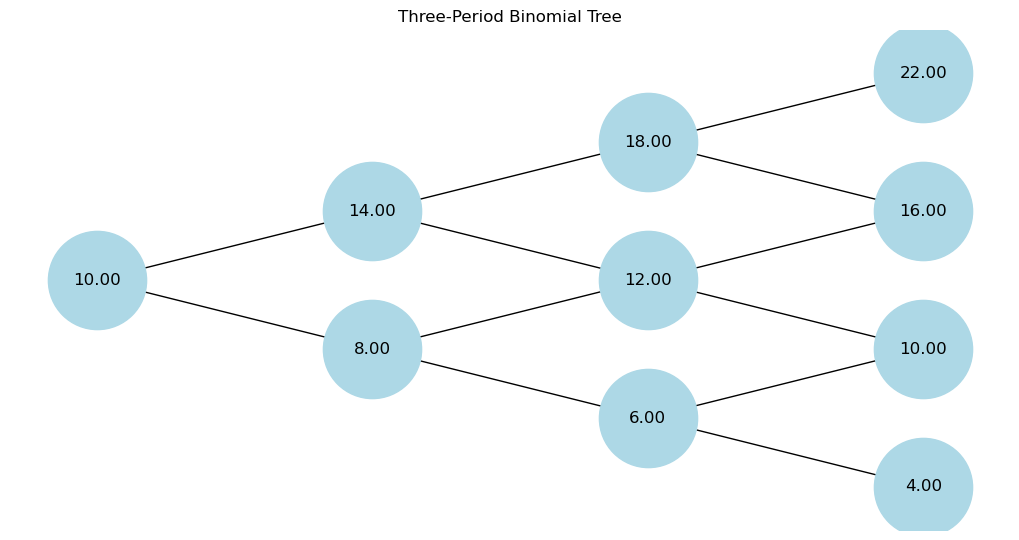

In [21]:

def build_binomial_tree(periods, initial_value, up_step, down_step):
    G = nx.Graph()
    G.add_node((0, 0), value=initial_value)

    for t in range(1, periods + 1):
        for node in list(G.nodes):
            x, y = node
            value = G.nodes[node]['value']
            G.nodes[node]['value'] = value  # Keep the original node value

            # Create upward and downward nodes
            up_node = (x + 1, y + 1)
            down_node = (x + 1, y - 1)

            # Calculate the new values
            up_value = value + up_step
            down_value = value - down_step

            # Add nodes and edges


            G.add_node(down_node, value=down_value)
            G.add_node(up_node, value=up_value)
            G.add_edge(node, down_node)
            G.add_edge(node, up_node)


    return G

def plot_binomial_tree(binomial_tree):
    pos = {}
    labels = {}
    for node in binomial_tree.nodes:
        x, y = node
        pos[node] = (x, y)  # Flip y-axis for visualization
        labels[node] = f'{binomial_tree.nodes[node]["value"]:.2f}'

    plt.figure(figsize=(10, 5))
    nx.draw(binomial_tree, pos=pos, labels=labels, with_labels=True, node_size=5000, node_color='lightblue')
    plt.title('Three-Period Binomial Tree')
    plt.show()

# Parameters
periods = 3
initial_value = 10
up_step = 4
down_step = 2

# Build and plot the binomial tree
binomial_tree = build_binomial_tree(periods, initial_value, up_step, down_step)
plot_binomial_tree(binomial_tree)


## Question 4 | Dice Problem

You roll a pair of dice. What is the probability the difference between the highest and lowest pair of $(x,y)$ is equal to 4.<br>
Number of outcomes is $36$.

There are 4 different ways of this outcome: <br>
$[{(1,5),(5,1),(2,6),(6,2)}]$

$P({x}) = \frac{1}{9}$


## Question 5 | Possion Probability Problem

- This one I was not 100p sure about. 

A random variable X follows a poisson probability distribution: <br>

\begin{align*}

P(X = x) = \frac{e^{-\lambda}\lambda^x}{x!}

\end{align*}

where $\lambda$ is the average value of X.

The question was something like this: <br>

A random variable event X occured at minute 5, minute 12, however after waiting another 7 minutes event X has not occured. What is the value of $\lambda$?

I just found the average of 5, 12, and 7, but I do not know if this was right because the last event did not occur. I  got an answer of 8. 